# TODO
exploit Cabin and Ticket & age feature instead of dropping

In [17]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

In [11]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

// make sure new CodeMirror instance also use this setting
CodeMirror.defaults.cursorBlinkRate=rate;

<IPython.core.display.Javascript object>

In [52]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Paul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

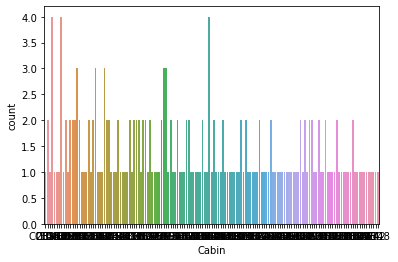

In [54]:
sns.countplot("Cabin", data = df)

In [55]:
df = df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis = 1)

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\Users\Paul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

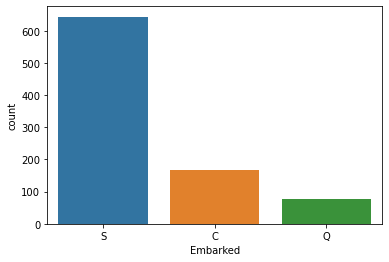

In [57]:
sns.countplot("Embarked", data = df)

In [58]:
df = pd.get_dummies(df, columns = ["Embarked"])
le = preprocessing.LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [59]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [60]:
df = df.dropna()
df = df.reset_index()
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,1,0,38.0,1,0,71.2833,1,0,0
2,2,1,3,0,26.0,0,0,7.9250,0,0,1
3,3,1,1,0,35.0,1,0,53.1000,0,0,1
4,4,0,3,1,35.0,0,0,8.0500,0,0,1


In [76]:
class TitanicData(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __getitem__(self, idx):
        features = self.df.loc[idx].drop("Survived")
        label = self.df.loc[idx, "Survived"]
        return torch.tensor(features), torch.tensor(label)
    
    def __len__(self):
        return len(self.df)

In [84]:
batch_size = 64
train_dataset = TitanicData(df)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

In [91]:
class TitanicModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
    
    def forward(self, x):
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.Softmax(self.fc3(x))
        return x
    
model = TitanicModel()

In [92]:
opt = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [93]:
nb_epochs = 3

for epoch in range(nb_epochs):
    print(f"--------- epoch n°{epoch + 1}/{nb_epochs} ------------")
    sum_loss = 0
    for b, batch in enumerate(train_loader):
        features, labels = batch
        
        # zero grad
        opt.zero_grad()
        
        # pass batch through model
        output = model(features)
        
        # get loss
        loss = criterion(output, labels)
        
        # backpropagate
        loss.backward()
        
        # optimize
        opt.step()
        
        
        
        sum_loss += loss.item()
    print(f"loss is {sum_loss / batch_size}")
    

--------- epoch n°1/3 ------------
torch.Size([64, 10])


RuntimeError: expected scalar type Float but found Double